<a href="https://colab.research.google.com/github/Tapishi/Pattern-Separation-using-Logistic-Regressions/blob/main/LR_application_for_Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [ ]:
X_data_frame = pd.read_csv('heart.csv')

In [ ]:
X_data_frame.head() #checking the categories

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X_data_frame.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


There are 303 samples

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
#converting categorical variables to dummy variables
cp = pd.get_dummies(X_data_frame['cp'], prefix = "cp")
th = pd.get_dummies(X_data_frame['thal'], prefix = "thal")
sl = pd.get_dummies(X_data_frame['slope'], prefix = "slope")
frames = [X_data_frame, cp, th, sl]
X_data_frame = pd.concat(frames, axis = 1)
#X_data_frame.head()


In [ ]:
#after converting it into categorical variables, dropping those variables
X_data_frame = X_data_frame.drop(columns = ['cp', 'thal', 'slope'])
X_data_frame.head()
y = X_data_frame.target.values
x_data = X_data_frame.drop(['target'], axis = 1)


In [ ]:
#normalising the values of x so that the cluster isnt widely spread out
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
#splitting the data into testing and training sets
x_tr, x_te, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [ ]:
# Let us convert data frame to numpy array
x_train = (x_tr).to_numpy()
x_test = (x_te).to_numpy()



In [ ]:
print(x_train.shape)
print(y_train)

(242, 21)
[1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0]


In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
def error(scores, labels):
  scores[scores > 0] = 1
  scores[scores <= 0] = 0
  return np.sum(np.abs(scores - labels)) / float(np.size(labels))


In [ ]:
import cvxpy as cp

In [ ]:
n=21
m=242
beta=cp.Variable((n))
b=cp.Variable(1)
log_likelihood = cp.sum(cp.multiply(y_train, x_train @ beta+b) - cp.logistic(x_train @ beta+b))
problem = cp.Problem(cp.Maximize(log_likelihood/m ))
problem.solve()
beta=beta.value
b=b.value
train_error_lm = error( (x_train @ beta+b), y_train)
print(train_error_lm)

0.13636363636363635


In [ ]:
test_error_lm = error( (x_test @ beta+b), y_test)
print(test_error_lm)

0.14754098360655737


In [ ]:
beta = cp.Variable(n)
b=cp.Variable(1)
log_likelihood = cp.sum(cp.multiply(y_train, x_train @ beta+b) - cp.logistic(x_train @ beta+b))
intervals=200
train_error = []
test_error = []
lambda_vals = np.logspace(-2, 5, intervals)
beta_vals = []
b_vals=[]
for i in range(intervals):
    lamb=lambda_vals
    obj=cp.Maximize(log_likelihood/m - lamb[i] * cp.norm(beta, 1))
    problem = cp.Problem(obj)
    problem.solve()
    train_error.append(error( (x_train @ beta+b).value, y_train))
    test_error.append(error( (x_test @ beta+b).value, y_test))
    beta_vals.append(beta.value)
    b_vals.append(b.value)

In [ ]:
t=test_error
aa=t.index(min(t))
print(lambda_vals[aa])
print(t[aa])

0.013826221737646556
0.13114754098360656


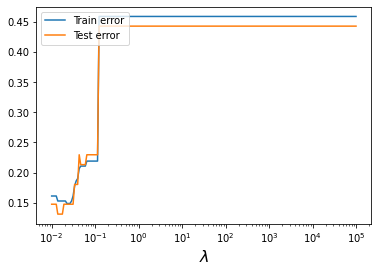

In [ ]:
plt.plot(lambda_vals, train_error, label="Train error")
plt.plot(lambda_vals, test_error, label="Test error")
plt.xscale("log")
plt.legend(loc="upper left")
plt.xlabel(r"$\lambda$", fontsize=16)
plt.show()

In [ ]:
y_prediction=[]
for i in range(0,len(y_test)):
  h=x_test[i] @ beta_vals[aa]+b_vals[aa]
  if h <= 0:
    y_prediction.append(0)
  else:
    y_prediction.append(1)

In [ ]:
acc=0
wro=0
for i in range(0,len(y_test)):
  if y_test[i]==y_prediction[i]:
    acc=acc+1
  else:
    wro=wro+1
print(acc/(acc+wro))#accuracy percentage of my model

0.8688524590163934
